In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set max rows displayed
pd.set_option('display.max_rows', 300)

In [2]:
# import 2nd dataset from lloyds
bank = pd.read_csv('simulated_transaction_2024.csv')

In [3]:
bank.head(10)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.00,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.00,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.00,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.00,1825.00,NaN,Fat Face
5,01/01/2023,00:00,203466392.0,4607.66,2841.66,NaN,Lavender Primary
6,01/01/2023,00:00,768271776.0,3620.00,1950.00,NaN,A Cut Above
7,01/01/2023,00:00,768271776.0,2840.00,-780.00,215404070.0,NaN
8,01/01/2023,00:00,215404070.0,1965.00,780.00,768271776.0,NaN
9,01/01/2023,00:00,456221621.0,2831.00,1675.00,NaN,Tesco


In [31]:
personal_accounts=bank['Account No'].unique()

#print(personal_accounts)
print(f'Number of individuals',len(personal_accounts))

Number of individuals 977


## Investigate Categories

In [5]:
merchants = bank['Third Party Name'].unique()
print(merchants)

# print number of unique merchants
print('Number of unique merchants: ', len(merchants))

['Westport Care Home' 'Barbiee Boutique' nan 'Fat Face' 'Lavender Primary'
 'A Cut Above' 'Tesco' 'Brilliant Brushes' 'Costa Coffee'
 'Premier Finance' 'North Face' 'Craftastic' 'Fitted Stitch' 'Selfridges'
 'Starbucks' 'The Crown' 'Cass Art' 'Green Park Academy' 'Rose & Crown'
 'Kings Arms' 'Sunny Care Nursery' 'A Yarn Story' 'Pets Corner'
 'Lavender Fields' 'Victoria Park' 'Halifax' 'LBG' 'Blizzard' 'Xbox'
 'Mojang Studios' 'PureGym' 'Disney' 'Netflix' 'Grand Union BJJ' 'Amazon'
 'SquareOnix' 'Deliveroo' 'JustEat' 'Coop Local' 'Sainsbury' 'AMAZON'
 'The Works' "Blackwell's" 'Topshop' 'Matalan' 'Foyles' 'Wool'
 'Hobby Lobby' 'Revella' 'Sainsbury Local' 'Loosely Fitted'
 'Stitch By Stitch' 'Coffee #1' 'Hobbycraft' 'Lloyds Pharmacy'
 'Gamestation' 'CeX' 'Etsy' 'Five Senses Art' 'Sports Direct' 'Boots'
 'Reebok' 'JD Sports' 'Head' 'Frankie & Bennies' 'Gap Kids'
 'University College Hospital' 'CPA' 'Happy Days Home' 'Pets at Home'
 'Jollyes' 'Collector Cave' 'Vision Express' 'Green Park'


- Got roughly the same amount of merchants as in the last dataset but with actual business names.

#### Pricing distributions across similar merchants - supermarkets

In [61]:
# drop transactions where 'Amount' is positive as these are not spending out of the account
merchant_spending = bank[bank['Amount'] < 0]

# keep rows where 'Third Party Account No' is null as these aren't payments to personal accounts
merchant_spending = merchant_spending[merchant_spending['Third Party Account No'].isnull()]

merchant_spending.tail(10)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
230586,2023-12-06,20:39,166019891.0,9482.471051,-62.47,NaN,AMAZON
230587,2023-12-06,20:40,975345315.0,40907.910578,-73.71,NaN,Tesco
230588,2023-12-06,20:43,106601471.0,11920.401863,-37.25,NaN,Coop Local
230589,2023-12-06,20:48,522188082.0,8471.141437,-17.05,NaN,AMAZON
230590,2023-12-06,20:50,256002321.0,7582.389937,-24.80,NaN,Sainsbury Local
230591,2023-12-06,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,2023-12-06,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,2023-12-06,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,2023-12-06,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon
230595,2023-12-06,21:32,259015404.0,1145.349837,-37.64,NaN,JustEat


- Can see there's payment's to banks going out at midnight - potentially recurring payments (potentially standing orders) for personal saving's/investment accounts or rent?
- These need to be removed before conducting segmentation activities.

In [33]:
# select only the transactions that are from the merchant 'Tesco' and 'Sainsbury Local'
tesco = merchant_spending[merchant_spending['Third Party Name'] == 'Tesco']
sainsbury_local = merchant_spending[merchant_spending['Third Party Name'] == 'Sainsbury Local']
sainsbury = merchant_spending[merchant_spending['Third Party Name'] == 'Sainsbury']
coop_local = merchant_spending[merchant_spending['Third Party Name'] == 'Coop Local']

supermarkets = pd.concat([sainsbury_local['Amount'].describe(), tesco['Amount'].describe(), sainsbury['Amount'].describe(),coop_local['Amount'].describe()],axis=1)
supermarkets.columns = ['Sainsbury Local', 'Tesco', 'Sainsbury', 'Co-op Local']
supermarkets

,Sainsbury Local,Tesco,Sainsbury,Co-op Local
count,3155.000000,33905.000000,3117.000000,2610.000000
mean,-42.450051,-75.041815,-43.679734,-36.283169
std,42.938658,50.944684,43.357148,36.847738
min,-320.750000,-348.350000,-303.800000,-270.700000
25%,-57.905000,-102.440000,-60.280000,-50.347500
50%,-31.120000,-62.980000,-31.310000,-25.000000
75%,-11.935000,-38.270000,-11.970000,-9.617500
max,-0.010000,-0.010000,-0.010000,-0.010000


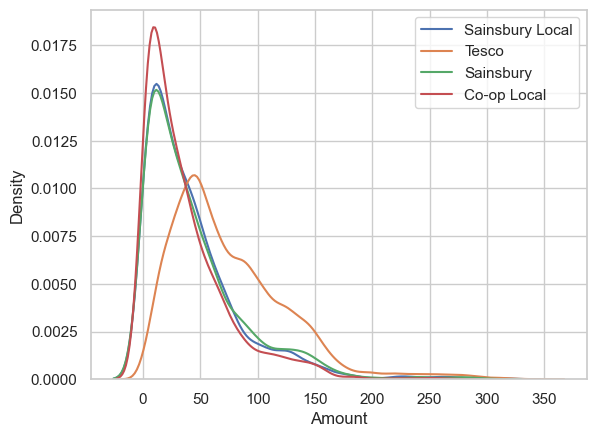

In [55]:
#kde plot of spending at all supermarkets
# set white grid
#sns.set(style='whitegrid')
sns.kdeplot(-1*sainsbury_local['Amount'], label='Sainsbury Local')
sns.kdeplot(-1*tesco['Amount'], label='Tesco')
sns.kdeplot(-1*sainsbury['Amount'], label='Sainsbury')
sns.kdeplot(-1*coop_local['Amount'], label='Co-op Local')

# show legend
plt.legend()

#### Pricing distributions over coffee shops

In [8]:
starbucks = merchant_spending[merchant_spending['Third Party Name'] == 'Starbucks']
costa_coffee = merchant_spending[merchant_spending['Third Party Name'] == 'Costa Coffee']
coffee_1 = merchant_spending[merchant_spending['Third Party Name'] == 'Coffee #1']

coffee = pd.concat([starbucks['Amount'].describe(), costa_coffee['Amount'].describe(), coffee_1['Amount'].describe()],axis=1)
coffee.columns = ['Starbucks', 'Costa Coffee', 'Coffee #1']
coffee

,Starbucks,Costa Coffee,Coffee #1
count,4821.000000,677.000000,2298.000000
mean,-5.984505,-5.988774,-5.995735
std,1.509033,0.945160,1.785399
min,-90.000000,-8.300000,-80.000000
25%,-6.500000,-6.500000,-6.500000
50%,-5.800000,-5.800000,-5.750000
75%,-5.400000,-5.350000,-5.400000
max,-2.800000,-2.800000,-2.800000


<Axes: xlabel='Amount', ylabel='Density'>

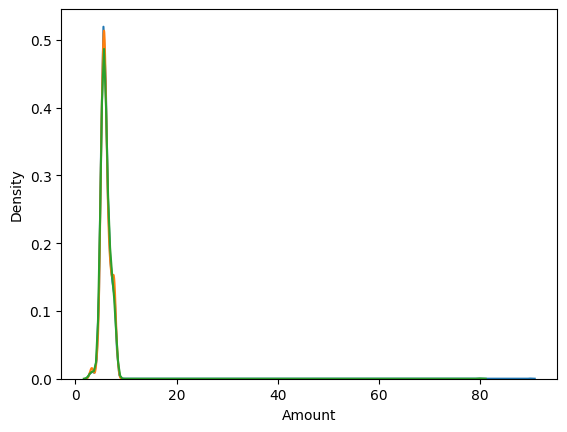

In [37]:
# kde plot of spending at all coffee shops
sns.kdeplot(-1*starbucks['Amount'], label='Starbucks')
sns.kdeplot(-1*costa_coffee['Amount'], label='Costa Coffee')
sns.kdeplot(-1*coffee_1['Amount'], label='Coffee #1')

- Beginning to see rough alignment in terms of spending mean and variance

#### Pricing distributions over opticians + pharmacy

In [59]:
vision_express = merchant_spending[merchant_spending['Third Party Name'] == 'Vision Express']
lloyds_pharmacy = merchant_spending[merchant_spending['Third Party Name'] == 'Lloyds Pharmacy']
specsavers = merchant_spending[merchant_spending['Third Party Name'] == 'Specsavers']
boots = merchant_spending[merchant_spending['Third Party Name'] == 'Boots']

health = pd.concat([vision_express['Amount'].describe(), lloyds_pharmacy['Amount'].describe(), specsavers['Amount'].describe(),boots['Amount'].describe()],axis=1)
health.columns = ['Vision Express', 'Lloyds Pharmacy', 'Specsavers','Boots']

health

,Vision Express,Lloyds Pharmacy,Specsavers,Boots
count,1.0,1997.000000,1.0,2046.000000
mean,-220.0,-24.232168,-270.0,-23.300303
std,NaN,20.679275,NaN,19.675742
min,-220.0,-210.000000,-270.0,-88.980000
25%,-220.0,-36.120000,-270.0,-34.905000
50%,-220.0,-18.190000,-270.0,-17.720000
75%,-220.0,-7.700000,-270.0,-6.935000
max,-220.0,-0.010000,-270.0,-0.020000


In [44]:
vision_express

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
101970,2023-06-06,06:27,198051483.0,-291.65171,-220.0,NaN,Vision Express


- Specsavers and vision express seem to only have one outgoing transaction

C:\Users\donjo\AppData\Local\Temp\ipykernel_13892\593403280.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(-1*vision_express['Amount'], label='Vision Express')
C:\Users\donjo\AppData\Local\Temp\ipykernel_13892\593403280.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(-1*specsavers['Amount'], label='Specsavers')


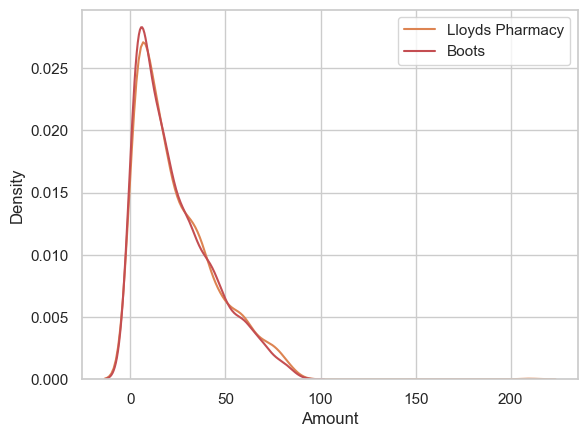

In [60]:
# kde plot of spending at all health stores
sns.kdeplot(-1*vision_express['Amount'], label='Vision Express')
sns.kdeplot(-1*lloyds_pharmacy['Amount'], label='Lloyds Pharmacy')
sns.kdeplot(-1*specsavers['Amount'], label='Specsavers')
sns.kdeplot(-1*boots['Amount'],label='Boots')   
plt.legend()    

- Boots and Lloyds Pharmacy are roughly aligned.

#### Pricing distributions - online retail and amazon

In [62]:
amazon = merchant_spending[merchant_spending['Third Party Name'] == 'Amazon']
AMAZON = merchant_spending[merchant_spending['Third Party Name'] == 'AMAZON']
disney = merchant_spending[merchant_spending['Third Party Name'] == 'Disney']
netflix = merchant_spending[merchant_spending['Third Party Name'] == 'Netflix']


online_merchants = pd.concat([amazon['Amount'].describe(), AMAZON['Amount'].describe(), disney['Amount'].describe(),netflix['Amount'].describe()],axis=1)
online_merchants.columns = ['Amazon', 'AMAZON', 'Disney','Netflix']

online_merchants

,Amazon,AMAZON,Disney,Netflix
count,7571.000000,2026.000000,3.952000e+03,7.775000e+03
mean,-16.272741,-23.598702,-7.990000e+00,-1.599000e+01
std,16.220929,19.770354,1.776582e-15,3.552942e-15
min,-88.120000,-88.620000,-7.990000e+00,-1.599000e+01
25%,-20.425000,-34.790000,-7.990000e+00,-1.599000e+01
50%,-7.990000,-18.745000,-7.990000e+00,-1.599000e+01
75%,-7.990000,-7.105000,-7.990000e+00,-1.599000e+01
max,-0.020000,-0.030000,-7.990000e+00,-1.599000e+01


- Netflix and disney plus are clearly direct debits with fixed costs.

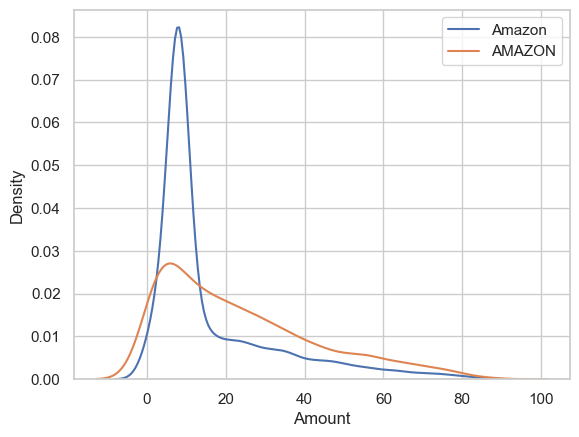

In [64]:
# kde plot of spending at amazon
sns.kdeplot(-1*amazon['Amount'], label='Amazon')
sns.kdeplot(-1*AMAZON['Amount'], label='AMAZON')
plt.legend()

#### Pricing distributions at gaming stores

In [65]:
mojang_studios = merchant_spending[merchant_spending['Third Party Name'] == 'Mojang Studios']
gamestation = merchant_spending[merchant_spending['Third Party Name'] == 'Gamestation']
cex = merchant_spending[merchant_spending['Third Party Name'] == 'CeX']
hmv = merchant_spending[merchant_spending['Third Party Name'] == 'HMV']


gaming = pd.concat([mojang_studios['Amount'].describe(), gamestation['Amount'].describe(), cex['Amount'].describe(),hmv['Amount'].describe()],axis=1)

gaming.columns = ['Mojang Studios', 'Gamestation', 'CeX','HMV']

gaming

,Mojang Studios,Gamestation,CeX,HMV
count,4.369000e+03,2822.000000,514.000000,1.0
mean,-5.990000e+00,-82.871471,-85.491284,-150.0
std,8.882801e-16,37.606161,36.719438,NaN
min,-5.990000e+00,-180.000000,-150.120000,-150.0
25%,-5.990000e+00,-109.970000,-119.970000,-150.0
50%,-5.990000e+00,-79.980000,-79.980000,-150.0
75%,-5.990000e+00,-49.990000,-49.990000,-150.0
max,-5.990000e+00,-19.990000,-19.990000,-150.0


In [67]:
hmv

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
99018,2023-06-01,04:17,957821152.0,-229.452704,-150.0,NaN,HMV


- Mojang studios is a direct debit for minecraft games.
- HMV has only a few outgoing transactions?

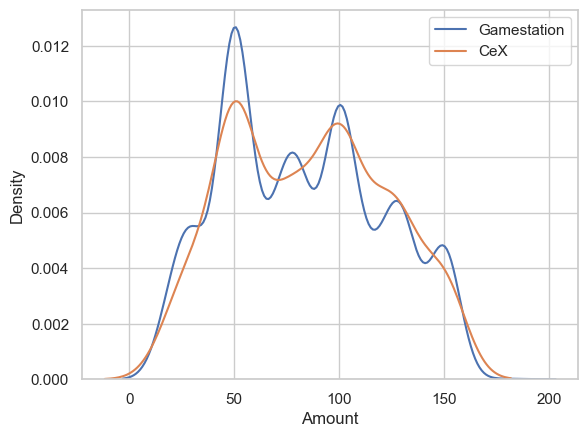

In [66]:
sns.kdeplot(-1*gamestation['Amount'], label='Gamestation')
sns.kdeplot(-1*cex['Amount'], label='CeX')

plt.legend()


## Investigate Missing Values

In [10]:
# null values across each feature
bank.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

##### Null third party account id

In [11]:
# display null values in 'Third Party Account No' using isnull()
null_beneficiary_accounts=bank[bank['Third Party Account No'].isnull()]
null_beneficiary_accounts

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face
5,01/01/2023,00:00,203466392.0,4607.660000,2841.66,NaN,Lavender Primary
6,01/01/2023,00:00,768271776.0,3620.000000,1950.00,NaN,A Cut Above
...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon


- NaNs in the 'Third Party Account No' indicate a transaction at a merchant. If these are negative - indicates a payment to the merchant, if positive it indicates and payment from the merchant - most likely a refund or salary.

#### Null third party name

In [12]:
# display null values in 'Third Party Account No'
null_merchant_name=bank[bank['Third Party Name'].isnull()]
null_merchant_name

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
7,01/01/2023,00:00,768271776.0,2840.000000,-780.00,215404070.0,NaN
8,01/01/2023,00:00,215404070.0,1965.000000,780.00,768271776.0,NaN
11,01/01/2023,00:00,350921975.0,1998.500000,-460.00,633362865.0,NaN
...,...,...,...,...,...,...,...
228822,04/12/2023,01:08,336171116.0,428.428400,380.00,973388795.0,NaN
228859,04/12/2023,03:09,349614277.0,748.375100,-950.00,871200314.0,NaN
228860,04/12/2023,03:09,871200314.0,539.105124,950.00,349614277.0,NaN
229016,04/12/2023,08:34,215426302.0,1118.800404,-43.20,NaN,NaN


- NaNs in third part name/merchant indicate a personal payment to another account - e.g. rent or potentially fraud?

#### Null values in balance

In [13]:
null_balance = bank[bank['Balance'].isnull()]   
null_balance.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
1392,01/01/2023,00:00,246753533.0,NaN,-100.00,NaN,Grand Union BJJ
4132,01/01/2023,00:00,726913482.0,NaN,-5.99,NaN,Mojang Studios
4593,01/01/2023,00:00,335698481.0,NaN,-18.99,NaN,PureGym
4771,01/01/2023,09:49,706250160.0,NaN,-60.92,NaN,The Works
4799,01/01/2023,10:01,647472692.0,NaN,-27.96,NaN,The Works


##### Null transaction amount

In [14]:
null_amount = bank[bank['Amount'].isnull()] 
null_amount.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
949,01/01/2023,00:00,857754342.0,2745.75,NaN,NaN,LBG
1821,01/01/2023,00:00,424397946.0,3358.01,NaN,NaN,PureGym
3937,01/01/2023,00:00,987656636.0,844.02,NaN,NaN,Disney
4071,01/01/2023,00:00,399538448.0,3506.07,NaN,NaN,Amazon
5443,01/01/2023,14:33,653640811.0,3288.74,NaN,NaN,Blackwell's


#### Null sender account number

In [15]:
null_sender_account = bank[bank['Account No'].isnull()]   
null_sender_account.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
527,01/01/2023,00:00,NaN,813.00,-1143.00,NaN,Halifax
1295,01/01/2023,00:00,NaN,2284.03,-18.99,NaN,PureGym
1335,01/01/2023,00:00,NaN,1542.03,-18.99,NaN,PureGym
1563,01/01/2023,00:00,NaN,3351.01,-15.99,NaN,Netflix
1703,01/01/2023,00:00,NaN,3785.78,-18.99,NaN,PureGym


#### Null timestamp

In [16]:
null_timestamp = bank[bank['Timestamp'].isnull()]
null_timestamp.head()    

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
2734,01/01/2023,NaN,593191200.0,1490.0200,-14.99,NaN,Blizzard
6129,02/01/2023,NaN,572384506.0,3193.0400,-9.99,NaN,The Works
6527,03/01/2023,NaN,196289502.0,855.8792,-47.56,NaN,Tesco
6693,03/01/2023,NaN,421475159.0,1375.4530,-99.98,NaN,Gamestation
7227,04/01/2023,NaN,760704118.0,2636.7748,-221.89,NaN,Fat Face


#### Null dates

In [17]:
null_dates = bank[bank['Date'].isnull()]    
null_dates.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
3918,NaN,00:00,554792076.0,575.02,-5.99,NaN,Mojang Studios
4106,NaN,00:00,581655972.0,6895.01,-15.99,NaN,Netflix
4511,NaN,00:00,711140907.0,1217.00,-7.00,NaN,Xbox
4710,NaN,09:23,310620484.0,992.08,-11.98,NaN,The Works
5931,NaN,09:33,550832673.0,631.12,-53.92,NaN,Blackwell's


## Calculating salaries of individuals

In [18]:
# max and min dates in bank dataset
# convert 'Date' to datetime format'
bank['Date'] = pd.to_datetime(bank['Date'],dayfirst=True)

# find the max and min dates in the dataset
max_date = bank['Date'].max()
min_date = bank['Date'].min()

print('Max date: ', max_date)
print('Min date: ', min_date)

Max date:  2023-12-06 00:00:00
Min date:  2023-01-01 00:00:00


In [19]:
# Just get positive transactions into the balance

print('Number of unique accounts in original bank: ', len(bank['Account No'].unique()))

bank_amount_incomings = bank[bank['Amount'] > 0]

# remove rows with null values in 'Third Party Name'
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Third Party Name'].notnull()]

#check if there are any null values in the dataset
bank_amount_incomings.isnull().sum()

# print number of unique accounts
print('Number of unique accounts after filtering for incomings only: ', len(bank_amount_incomings['Account No'].unique()))

bank_amount_incomings.head(10)

Number of unique accounts in original bank:  977
Number of unique accounts after filtering for incomings only:  617


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,2023-01-01,00:00,678330503.0,2971.00,1584.00,NaN,Westport Care Home
1,2023-01-01,00:00,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique
4,2023-01-01,00:00,624500124.0,3226.00,1825.00,NaN,Fat Face
5,2023-01-01,00:00,203466392.0,4607.66,2841.66,NaN,Lavender Primary
6,2023-01-01,00:00,768271776.0,3620.00,1950.00,NaN,A Cut Above
9,2023-01-01,00:00,456221621.0,2831.00,1675.00,NaN,Tesco
10,2023-01-01,00:00,350921975.0,2458.50,1842.50,NaN,Brilliant Brushes
12,2023-01-01,00:00,455831435.0,3253.10,1620.10,NaN,Costa Coffee
15,2023-01-01,00:00,832564361.0,5376.00,3542.00,NaN,Premier Finance
16,2023-01-01,00:00,407574996.0,3151.00,1609.00,NaN,Fat Face


In [20]:
# filter rows for only 2nd month of the year
bank_feb = bank_amount_incomings[bank_amount_incomings['Date'].dt.month == 2]

# get max and min dates in february
max_date_feb = bank_feb['Date'].max()
min_date_feb = bank_feb['Date'].min()

print('Max date in February: ', max_date_feb)
print('Min date in February: ', min_date_feb)

bank_feb.tail(15)


Max date in February:  2023-02-28 00:00:00
Min date in February:  2023-02-01 00:00:00


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
38879,2023-02-28,00:00,833499132.0,2556.168350,2708.00,NaN,Halifax
38882,2023-02-28,00:00,859264768.0,1815.465942,1545.00,NaN,Vision Express
38885,2023-02-28,00:00,788740658.0,2537.061150,1675.00,NaN,Matalan
38886,2023-02-28,00:00,106601471.0,2845.874540,1675.00,NaN,Hobbycraft
38887,2023-02-28,00:00,696333897.0,1716.316000,1842.50,NaN,Jollyes
38890,2023-02-28,00:00,558875206.0,3076.427350,3125.00,NaN,CPA
38891,2023-02-28,00:00,331450202.0,3791.867700,3087.75,NaN,CPA
38892,2023-02-28,00:00,683078800.0,3375.129867,3126.00,NaN,LBG
38895,2023-02-28,00:00,651756497.0,6075.964878,4375.00,NaN,CPA
38896,2023-02-28,00:00,435984758.0,2746.848874,2250.00,NaN,LBG


- Potentially need to remove last month as it only goes up to the 6th so may miss some people's incomes coming in as they seem to come in throughout the month.

In [21]:
# drop transactions in december
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Date'].dt.month != 12]

# group by Account No and sum the 'Amount' for each account
income_per_account = bank_amount_incomings.groupby('Account No')['Amount'].sum()

# calculate the annual income for each account
incomes=(income_per_account/11)*12 # multiply by 12 to get annual income
incomes_monthly = income_per_account/11

<Axes: xlabel='Amount', ylabel='Density'>

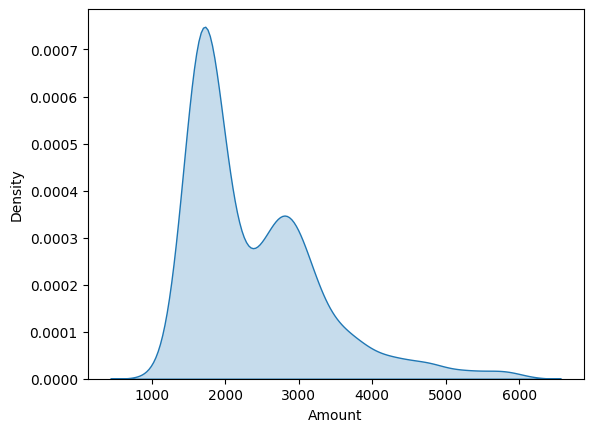

In [22]:
# kde plot of income per account
sns.kdeplot(incomes_monthly, fill=True)

#### HMV salaries